**Assignment**:
Can you build a model that can

1.   predict the sentiment of a customer review **(positive, negative, or neutral)** using natural language **processing** techniques?

You will be provided with a dataset containing customer reviews of a product.
**Please demonstrate **
1.   your understanding of the different types of NLP models and
2.   your ability to choose the most appropriate model for the given dataset.

**Instructions**:
You are suggested to use python as a language to solve the assignment and preferably using Jupyter notebooks or google colab for development is suggested.
You are not encouraged to copy the solution for doing this assignment.
You are free to perform all kinds of operations on the dataset.

https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset/code

# dataset and basic EDA

In [ ]:
import pandas as pd

In [ ]:
# import csv
df = pd.read_csv('/content/Dataset-SA.csv')

In [ ]:
df.iloc[0]

product_name     Candes 12 L Room/Personal Air Cooler??????(Whi...
product_price                                                 3999
Rate                                                             5
Review                                                      super!
Summary          great cooler excellent air flow and for this p...
Sentiment                                                 positive
Name: 0, dtype: object

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [ ]:
length_texts = [len(str(i).split(" ")) for i in df["Summary"]]
index = length_texts.index(max(length_texts))
#find row with highest words
len(str(df["Summary"][index]).split(" "))

108

In [ ]:
df["Sentiment"].value_counts()

positive    166581
negative     28232
neutral      10239
Name: Sentiment, dtype: int64

# text - preprocessing

In [ ]:
#remove null values
df.dropna( inplace=True)
df["Sentiment"].value_counts()

positive    147171
negative     24401
neutral       8807
Name: Sentiment, dtype: int64

#### remove class imbalance

In [ ]:
pos_reviews  = df[df["Sentiment"] == "positive"]


In [ ]:
from sklearn.utils import resample
pos_downsample = resample(pos_reviews,
             replace=True,
             n_samples=30000,
             random_state=42)
print(pos_downsample.shape)

(30000, 6)


In [ ]:
df = df[df.Sentiment != "positive"]

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
32,Candes 60 L Room/Personal Air Cooler??????(Whi...,8999,2,expected a better product,bad quality,negative
48,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,1,waste of money!,small wire and moter capacity is very low fan ...,negative


positive    30000
negative    24401
neutral      8807
Name: Sentiment, dtype: int64


<Axes: ylabel='Type'>

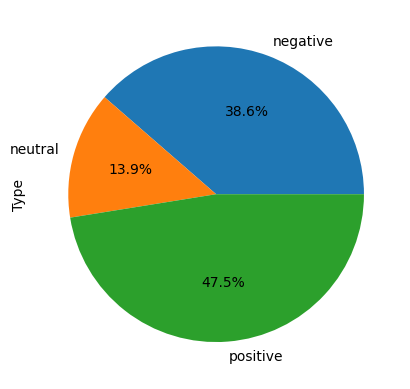

In [ ]:
df_downsampled = pd.concat([pos_downsample, df])

print(df_downsampled["Sentiment"].value_counts())

df_downsampled.groupby('Sentiment').size().plot(kind='pie',
                                       y = "Sentiment",
                                       label = "Type",
                                       autopct='%1.1f%%')

<Axes: ylabel='Type'>

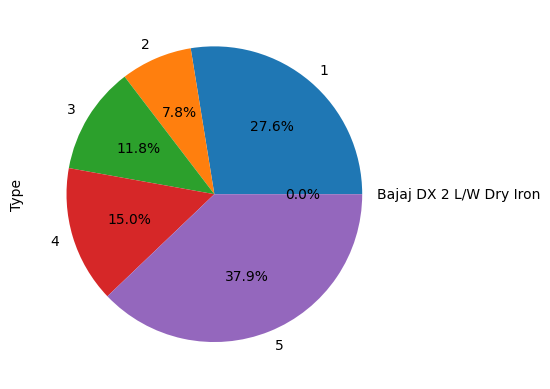

In [ ]:
ratings = df_downsampled["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

df_downsampled.groupby('Rate').size().plot(kind='pie',
                                       y = "Rate",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
df_downsampled.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
174858,Bajaj DX 2 LW Dry Iron,529,5,excellent,super,positive
204709,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,nice product,superb quality,positive
187377,Men Regular Fit Black Cotton Blend Trousers,409,4,not specified,good,positive
152438,Home Sizzler 214 cm 702 ft Polyester Semi Tran...,399,4,value-for-money,good money worth,positive
172401,Microtek MTKAC90H Super Power Digital UPS Mode...,5079,5,good,good product,positive


In [ ]:
df_downsampled.to_csv("fk_downsampled3101224.csv")

In [ ]:
df_downsampled = pd.read_csv("/content/fk_downsampled3101224.csv",index_col=0)
df_downsampled.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
174858,Bajaj DX 2 LW Dry Iron,529,5,excellent,super,positive
204709,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,nice product,superb quality,positive
187377,Men Regular Fit Black Cotton Blend Trousers,409,4,not specified,good,positive
152438,Home Sizzler 214 cm 702 ft Polyester Semi Tran...,399,4,value-for-money,good money worth,positive
172401,Microtek MTKAC90H Super Power Digital UPS Mode...,5079,5,good,good product,positive


# feature importance

In [ ]:
### not computing due to lack of time
# posible ways :
# """
# computing correlation
# forward feature selecion
# """

# basic nltk solution

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

basic_nltk = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
vader_scores = {}
index=0
for i, row in tqdm(df_downsampled.iterrows(), total=len(df_downsampled)):
    text = row['Review']+" "+row["Summary"]
    vader_scores[index] = basic_nltk.polarity_scores(text)
    cscore = basic_nltk.polarity_scores(text)["compound"]
    if cscore > 0.5 :
      vader_scores[index]["label_vader"] = "positive"
    elif cscore <= 0.5 and cscore > -0.5 :
      vader_scores[index]["label_vader"] = "neutral"
    else:
      vader_scores[index]["label_vader"] = "negative"
    index += 1

  0%|          | 0/63208 [00:00<?, ?it/s]

In [ ]:
vadersdf = pd.DataFrame(vader_scores).T
vadersdf = vadersdf.reset_index().rename(columns={'index': 'id'})

In [ ]:
vadersdf.head()

,id,neg,neu,pos,compound,label_vader
0,0,0.0,0.0,1.0,0.8225,positive
1,1,0.0,0.225,0.775,0.7845,positive
2,2,0.546,0.454,0.0,-0.3412,neutral
3,3,0.0,0.294,0.706,0.5859,positive
4,4,0.0,0.147,0.853,0.7003,positive


In [ ]:
df_downsampled.iloc[2]
text = df_downsampled.iloc[2]['Review']+" "+df_downsampled.iloc[2]["Summary"]
print(basic_nltk.polarity_scores(text))


{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3412}


In [ ]:
len(df_downsampled)

63208

In [ ]:
df_downsampled["vader_label"] = vadersdf["label_vader"].to_list()

In [ ]:
df_downsampled.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,vader_label
174858,Bajaj DX 2 LW Dry Iron,529,5,excellent,super,positive,positive
204709,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,nice product,superb quality,positive,positive
187377,Men Regular Fit Black Cotton Blend Trousers,409,4,not specified,good,positive,neutral
152438,Home Sizzler 214 cm 702 ft Polyester Semi Tran...,399,4,value-for-money,good money worth,positive,positive
172401,Microtek MTKAC90H Super Power Digital UPS Mode...,5079,5,good,good product,positive,positive


In [ ]:
# compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df_downsampled["Sentiment"],df_downsampled['vader_label'])

0.6960036704214656

In [ ]:
df_downsampled.to_csv("fk_downsampled_vader3101224.csv")

In [ ]:
df_downsampled = pd.read_csv("/content/fk_downsampled_vader3101224.csv",index_col=0)

# huggingface pretrained model

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
dfd = df_downsampled

In [ ]:
sent_pipeline(df_downsampled.iloc[2]['Review']+" "+df_downsampled.iloc[2]["Summary"])

[{'label': 'NEGATIVE', 'score': 0.9993482232093811}]

In [ ]:
#computing only for 2% data as it is taking time
from sklearn.model_selection import train_test_split
y = dfd["Sentiment"]
x = dfd["Review"].astype(str)+" "+dfd["Summary"].astype(str)
XT, XV, YT, YV = train_test_split(x,y,test_size= 0.98,random_state=3, stratify = y)

In [ ]:
XT = XT.to_frame("Text")
YT = YT.to_frame("Sentiment")
XT["Sentiment"] = YT["Sentiment"].to_list()
XT.head()

,Text,Sentiment
172728,decent product gud inverter,positive
63617,excellent very well packed good deal at very l...,positive
193939,good choice good product,positive
91696,nice not that stable but overall good,neutral
33992,worth the money good,positive


In [ ]:
len(XT)

1264

In [ ]:
hf_scores = {}
index = 0
for i, row in tqdm(XT.iterrows(), total=len(XT)):
  text = row["Text"]
  hf_scores[index] = sent_pipeline(text)[0]["label"].lower()
  index+=1


  0%|          | 0/1264 [00:00<?, ?it/s]

In [ ]:
hfdf = pd.DataFrame(hf_scores,index=["HF_label"]).T
hfdf = hfdf.reset_index().rename(columns={'index': 'id'})
hfdf["HF_label"].value_counts()

positive    676
negative    588
Name: HF_label, dtype: int64

In [ ]:
XT["HF_label"] = hfdf["HF_label"].to_list()

In [ ]:
hfs_scores = {}
index = 0
for i, row in tqdm(XT.iterrows(), total=len(XT)):
  text = row["Text"]
  hfs_scores[index] = specific_model(text)[0]["label"]
  index+=1

  0%|          | 0/1264 [00:00<?, ?it/s]

In [ ]:
for i in hfs_scores:
  if hfs_scores[i]=="POS":
    hfs_scores[i]="positive"
  elif hfs_scores[i]=="NEG":
    hfs_scores[i]="negative"
  else:
    hfs_scores[i]="neutral"

In [ ]:
hfdf = pd.DataFrame(hfs_scores,index=["HFS_label"]).T
hfdf = hfdf.reset_index().rename(columns={'index': 'id'})
hfdf["HFS_label"].value_counts()

positive    645
negative    521
neutral      98
Name: HFS_label, dtype: int64

In [ ]:
XT["HFS_label"] = hfdf["HFS_label"].to_list()

In [ ]:
XT.to_csv("XT.csv")

## Metrics

In [ ]:
# compute accuracy
from sklearn.metrics import accuracy_score
vaccuracy = accuracy_score(df_downsampled["Sentiment"],df_downsampled['vader_label'])
spaccuracy = accuracy_score(XT["Sentiment"],XT['HF_label'])
sspaccuracy = accuracy_score(XT["Sentiment"],XT['HFS_label'])
print(f"vaccuracy :{vaccuracy}\nspaccuracy :{spaccuracy}\nsp_specifi_accuracy :{sspaccuracy}")

vaccuracy :0.6960036704214656
spaccuracy :0.7832278481012658
sp_specifi_accuracy :0.819620253164557


## ML solution


In [ ]:
#clean data
# split train test
#choose the vectorizer(currently going ahead with tf-idf as 1st trial)
#choose the algorthim
#choose the metric and compute

In [ ]:
dfm = df_downsampled

In [ ]:
dfm.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,vader_label
174858,Bajaj DX 2 LW Dry Iron,529,5,excellent,super,positive,positive
204709,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,nice product,superb quality,positive,positive
187377,Men Regular Fit Black Cotton Blend Trousers,409,4,not specified,good,positive,neutral
152438,Home Sizzler 214 cm 702 ft Polyester Semi Tran...,399,4,value-for-money,good money worth,positive,positive
172401,Microtek MTKAC90H Super Power Digital UPS Mode...,5079,5,good,good product,positive,positive


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
import string

In [ ]:
def clean_text(text):
  text = text.lower() #convert to lower case for uniformity
  text = " ".join([w for w in text.split() if ( w not in english_stop_words) and (w not in [" ",""])])
  text = " ".join([stemmer.stem(w) for w in text.split()])
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [ ]:
clean_text("????What does this do to the results ??")

'what result '

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(df_downsampled["Sentiment"])
# list(le.classes_)
# # le.transform([""])
# # list(le.inverse_transform([]))

In [ ]:
dfm["text"] = dfm["Review"].astype(str)+" "+dfm["Summary"].astype(str)
dfm.drop(["vader_label","product_name","product_price","Review","Summary"],axis=1,inplace=True)
dfm.head()

,Rate,Sentiment,text
174858,5,positive,excellent super
204709,4,positive,nice product superb quality
187377,4,positive,not specified good
152438,4,positive,value-for-money good money worth
172401,5,positive,good good product


In [ ]:
dfm["text"]=dfm["text"].apply(clean_text)

In [ ]:
dfm.to_csv("dfm.csv")

In [ ]:
dfm = pd.read_csv("dfm.csv",index_col=0)

In [ ]:
from sklearn.model_selection import train_test_split
y = dfm["Sentiment"]
x = dfm[["Rate","text"]]
XT, XV, YT, YV = train_test_split(x,y,test_size= 0.2,random_state=3, stratify = y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfv = TfidfVectorizer()
XT_tfidf = tfv.fit_transform(XT["text"])

In [ ]:
XV_tfidf = tfv.transform(XV["text"])

In [ ]:
XT_tfidf.shape

(50566, 17989)

In [ ]:
XV_tfidf.shape

(12642, 17989)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree

In [ ]:
model1 = tree.DecisionTreeClassifier()
model1.fit(XT_tfidf, YT)
y_pred= model1.predict(XV_tfidf)
acc_model1 = accuracy_score(YV, y_pred)
print(f"Accuracy of {model1} is {acc_model1}")
cm_model1 = confusion_matrix(YV, y_pred)
print(f"Confusion Matrix of {model1} is {cm_model1}")

Accuracy of DecisionTreeClassifier() is 0.8364973896535358
Confusion Matrix of DecisionTreeClassifier() is [[4152  368  360]
 [ 424  906  432]
 [ 243  240 5517]]


In [ ]:
model2 = svm.SVC()
model2.fit(XT_tfidf, YT)
y_pred= model2.predict(XV_tfidf)
acc_model2 = accuracy_score(YV, y_pred)
print(f"Accuracy of {model2} is {acc_model2}")
cm_model2 = confusion_matrix(YV, y_pred)
print(f"Confusion Matrix of {model2} is {cm_model2}")

Accuracy of SVC() is 0.8693244739756367
Confusion Matrix of SVC() is [[4432  164  284]
 [ 488  827  447]
 [ 181   88 5731]]


In [ ]:
model3 = RandomForestClassifier()
model3.fit(XT_tfidf, YT)
y_pred= model3.predict(XV_tfidf)
acc_model3 = accuracy_score(YV, y_pred)
print(f"Accuracy of {model3} is {acc_model3}")
cm_model3 = confusion_matrix(YV, y_pred)
print(f"Confusion Matrix of {model3} is {cm_model3}")

Accuracy of RandomForestClassifier() is 0.8677424458155355
Confusion Matrix of RandomForestClassifier() is [[4417  156  307]
 [ 479  807  476]
 [ 178   76 5746]]


Hence, from accuracy, currently the SVM classfier is performing the best

there is still scope for improvement with bertter cleaning, other vectorizers and including th rate column as well.

## gen AI solution

In [ ]:
!pip install langchain

In [ ]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip3 install llama-cpp-python
!pip3 install huggingface-hub
!pip3 install sentence-transformers langchain langchain-experimental


In [ ]:
!huggingface-cli download TheBloke/Llama-2-7b-Chat-GGUF llama-2-7b-chat.Q4_K_M.gguf --local-dir /content --local-dir-use-symlinks False

Consider using `hf_transfer` for faster downloads. This solution comes with some limitations. See https://huggingface.co/docs/huggingface_hub/hf_transfer for more details.
downloading https://huggingface.co/TheBloke/Llama-2-7b-Chat-GGUF/resolve/main/llama-2-7b-chat.Q4_K_M.gguf to /root/.cache/huggingface/hub/tmpj6c0tjc9
llama-2-7b-chat.Q4_K_M.gguf: 100% 4.08G/4.08G [00:48<00:00, 84.1MB/s]
/content/llama-2-7b-chat.Q4_K_M.gguf


In [ ]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.llms import LlamaCpp

In [ ]:
# performing only on 2% data

In [ ]:
template = """You are a sentiment analyzer. Read the given user feedback carefully, and classify as positive,negative or neutral.
give the respone in strictly one word.
for instance, if user feedback is "I am happy", respoinse should be "positive".
user feedback:
```{question}```
sentiment:
"""
prompt = PromptTemplate(template=template, input_variables=["question"])

In [ ]:
n_gpu_layers = -1
n_batch = 512
# Make sure the model path is correct for your system!
llm = LlamaCpp(
    model_path="/content/llama-2-7b-chat.Q4_K_M.gguf",
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    temperature = 0.1,
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 
Model metadata: {'tokenizer.ggml.unknown_token_id': '0', 'tokenizer.ggml.eos_token_id': '2', 'general.architecture': 'llama', 'llama.context_length': '4096', 'general.name': 'LLaMA v2', 'llama.embedding_length': '4096', 'llama.feed_forward_length': '11008', 'llama.attention.layer_norm_rms_epsilon': '0.000001', 'llama.rope.dimension_count': '128', 'llama.attention.head_count': '32', 'tokenizer.ggml.bos_token_id': '1', 'llama.block_count': '32', 'llama.attention.head_count_kv': '32', 'general.quantization_version': '2', 'tokenizer.ggml.model': 'llama', 'general.file_type': '15'}


In [ ]:
llm_chain = LLMChain(prompt=prompt, llm=llm)
question = "I am sad"
llm_chain.invoke(question)["text"]

'negative'

In [ ]:
df_downsampled = pd.read_csv("/content/fk_downsampled_vader3101224.csv",index_col=0) #reloading just in case

In [ ]:
 #computing only for 2% data as it is taking time
from sklearn.model_selection import train_test_split
y = df_downsampled["Sentiment"]
x = df_downsampled["Review"].astype(str)+" "+df_downsampled["Summary"].astype(str)
XT, XV, YT, YV = train_test_split(x,y,test_size= 0.98,random_state=3, stratify = y)

In [ ]:
XT = XT.to_frame("Text")
YT = YT.to_frame("Sentiment")
XT["Sentiment"] = YT["Sentiment"].to_list()
XT.head()

,Text,Sentiment
172728,decent product gud inverter,positive
63617,excellent very well packed good deal at very l...,positive
193939,good choice good product,positive
91696,nice not that stable but overall good,neutral
33992,worth the money good,positive


In [ ]:
genai_scores = {}
index = 0
for i, row in tqdm(XT.iterrows(), total=len(XT)):
  text = row["Text"]
  genai_scores[index] = llm_chain.invoke(text)["text"]
  index+=1

In [ ]:
genaidf = pd.DataFrame(genai_scores,index=["genai_label"]).T
genaidf = genaidf.reset_index().rename(columns={'index': 'id'})
genaidf["genai_label"].value_counts()

neutral                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     378
negative                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
XT["genai_label"] = genaidf["genai_label"].to_list()

In [ ]:
# compute accuracy
from sklearn.metrics import accuracy_score
genaiaccuracy = accuracy_score(XT["Sentiment"],XT['genai_label'])
print(f"genaiaccuracy :{genaiaccuracy}")

genaiaccuracy :0.442246835443038


the output of open source models is not consistent in terms of structure. Hence there is dip in the accuracy score. The above code was just to demostrate use of propmpt engineering to improve the response quality.
